


<h2 align="center">Simplilearn Certification Programs - Deep Learning with Keras and Tensorflow</h2>  

<div style="font-size:18px;">
<br/><b> <center> Project Report - House Loan Data Analysis </center></b><br/>
</div>

<div  style="font-size: 15px">
Organization: <b>Simplilearn (Certification Program)</b><br>
Course: <b>Deep Learning with Keras and Tensorflow</b><br>
Project: <b>House Loan Data Analysis</b><br>
Programming Language: <b>Python</b><br>
Submitted by: <b>Lavkush Singh</b>
</div>

## Problem Statement

**The project aims at building a deep learning model to predict the chance of default for future loans using the historical data. Thefore the objective of this Jupyter Notebook is to build a Deep Learning Model that predicts whether or not an applicant will be able to repay a loan using historical data.**

##### Analysis Tasks to be performed

- Load the dataset that is given to you
- Check for null values in the dataset
- Print percentage of default to payer of the dataset for the TARGET column
- Balance the dataset if the data is imbalanced
- Plot the balanced data or imbalanced data
- Encode the columns that is required for the model
- Calculate Sensitivity as a metrice
- Calculate area under receiver operating characteristics curve

In [187]:
# importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score
from plot_metric.functions import BinaryClassification

In [2]:
# setting options to display for jupyter notebook

pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows = None

### Task: Load the dataset 

In [3]:
data_main = pd.read_csv(r"E:\Github\Datasets\loan_data.csv", low_memory = False)

In [4]:
df = data_main.copy(deep = True) # creating the copy to keep the original data intact

#### Exploring the dataset

In [5]:
df.head() 

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info(verbose = True, show_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Non-Null Count   Dtype  
---   ------                        --------------   -----  
 0    SK_ID_CURR                    307511 non-null  int64  
 1    TARGET                        307511 non-null  int64  
 2    NAME_CONTRACT_TYPE            307511 non-null  object 
 3    CODE_GENDER                   307511 non-null  object 
 4    FLAG_OWN_CAR                  307511 non-null  object 
 5    FLAG_OWN_REALTY               307511 non-null  object 
 6    CNT_CHILDREN                  307511 non-null  int64  
 7    AMT_INCOME_TOTAL              307511 non-null  float64
 8    AMT_CREDIT                    307511 non-null  float64
 9    AMT_ANNUITY                   307499 non-null  float64
 10   AMT_GOODS_PRICE               307233 non-null  float64
 11   NAME_TYPE_SUITE               306219 non-null  object 
 12   NAME_INCOME_TYPE            

In [7]:
df['SK_ID_CURR'].nunique() == df.shape[0]  # checking if the column 'SK_ID_CURR' is unique identifier for the row

True

In [8]:
df = df.drop('SK_ID_CURR', axis = 1) # dropped 'SK_ID_CURR' since it is a unique identifier of the row

In [9]:
df['TARGET'].isnull().any() # checking if the TARGET column has null values

False

In [10]:
df['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

In [11]:
def create_nulls_df(dataframe):
    nulls_count = dataframe.isna().sum()[dataframe.isna().sum() > 0]
    nulls_info_df = pd.DataFrame({'column':nulls_count.index, 
                                  'null_values': nulls_count.values}).sort_values(by=['null_values'])
    nulls_info_df['nulls_percent'] = ((nulls_info_df['null_values']/df.shape[0])*100).round(2)

    return nulls_info_df

In [12]:
nulls_info_df = create_nulls_df(dataframe=df)
nulls_info_df

,column,null_values,nulls_percent
60,DAYS_LAST_PHONE_CHANGE,1,0.00
5,CNT_FAM_MEMBERS,2,0.00
0,AMT_ANNUITY,12,0.00
1,AMT_GOODS_PRICE,278,0.09
7,EXT_SOURCE_2,660,0.21
59,DEF_60_CNT_SOCIAL_CIRCLE,1021,0.33
58,OBS_60_CNT_SOCIAL_CIRCLE,1021,0.33
57,DEF_30_CNT_SOCIAL_CIRCLE,1021,0.33
56,OBS_30_CNT_SOCIAL_CIRCLE,1021,0.33
2,NAME_TYPE_SUITE,1292,0.42


In [13]:
nulls_info_df.shape

(67, 3)

In [14]:
cols_missing_more_40_percent = nulls_info_df[nulls_info_df['nulls_percent'] > 40]['column'].to_list()
print(cols_missing_more_40_percent)

['EMERGENCYSTATE_MODE', 'TOTALAREA_MODE', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BEGINEXPLUATATION_MEDI', 'FLOORSMAX_AVG', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'HOUSETYPE_MODE', 'LIVINGAREA_AVG', 'LIVINGAREA_MODE', 'LIVINGAREA_MEDI', 'ENTRANCES_MEDI', 'ENTRANCES_AVG', 'ENTRANCES_MODE', 'APARTMENTS_AVG', 'APARTMENTS_MODE', 'APARTMENTS_MEDI', 'WALLSMATERIAL_MODE', 'ELEVATORS_AVG', 'ELEVATORS_MEDI', 'ELEVATORS_MODE', 'NONLIVINGAREA_MEDI', 'NONLIVINGAREA_MODE', 'NONLIVINGAREA_AVG', 'EXT_SOURCE_1', 'BASEMENTAREA_MEDI', 'BASEMENTAREA_AVG', 'BASEMENTAREA_MODE', 'LANDAREA_MODE', 'LANDAREA_MEDI', 'LANDAREA_AVG', 'OWN_CAR_AGE', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI

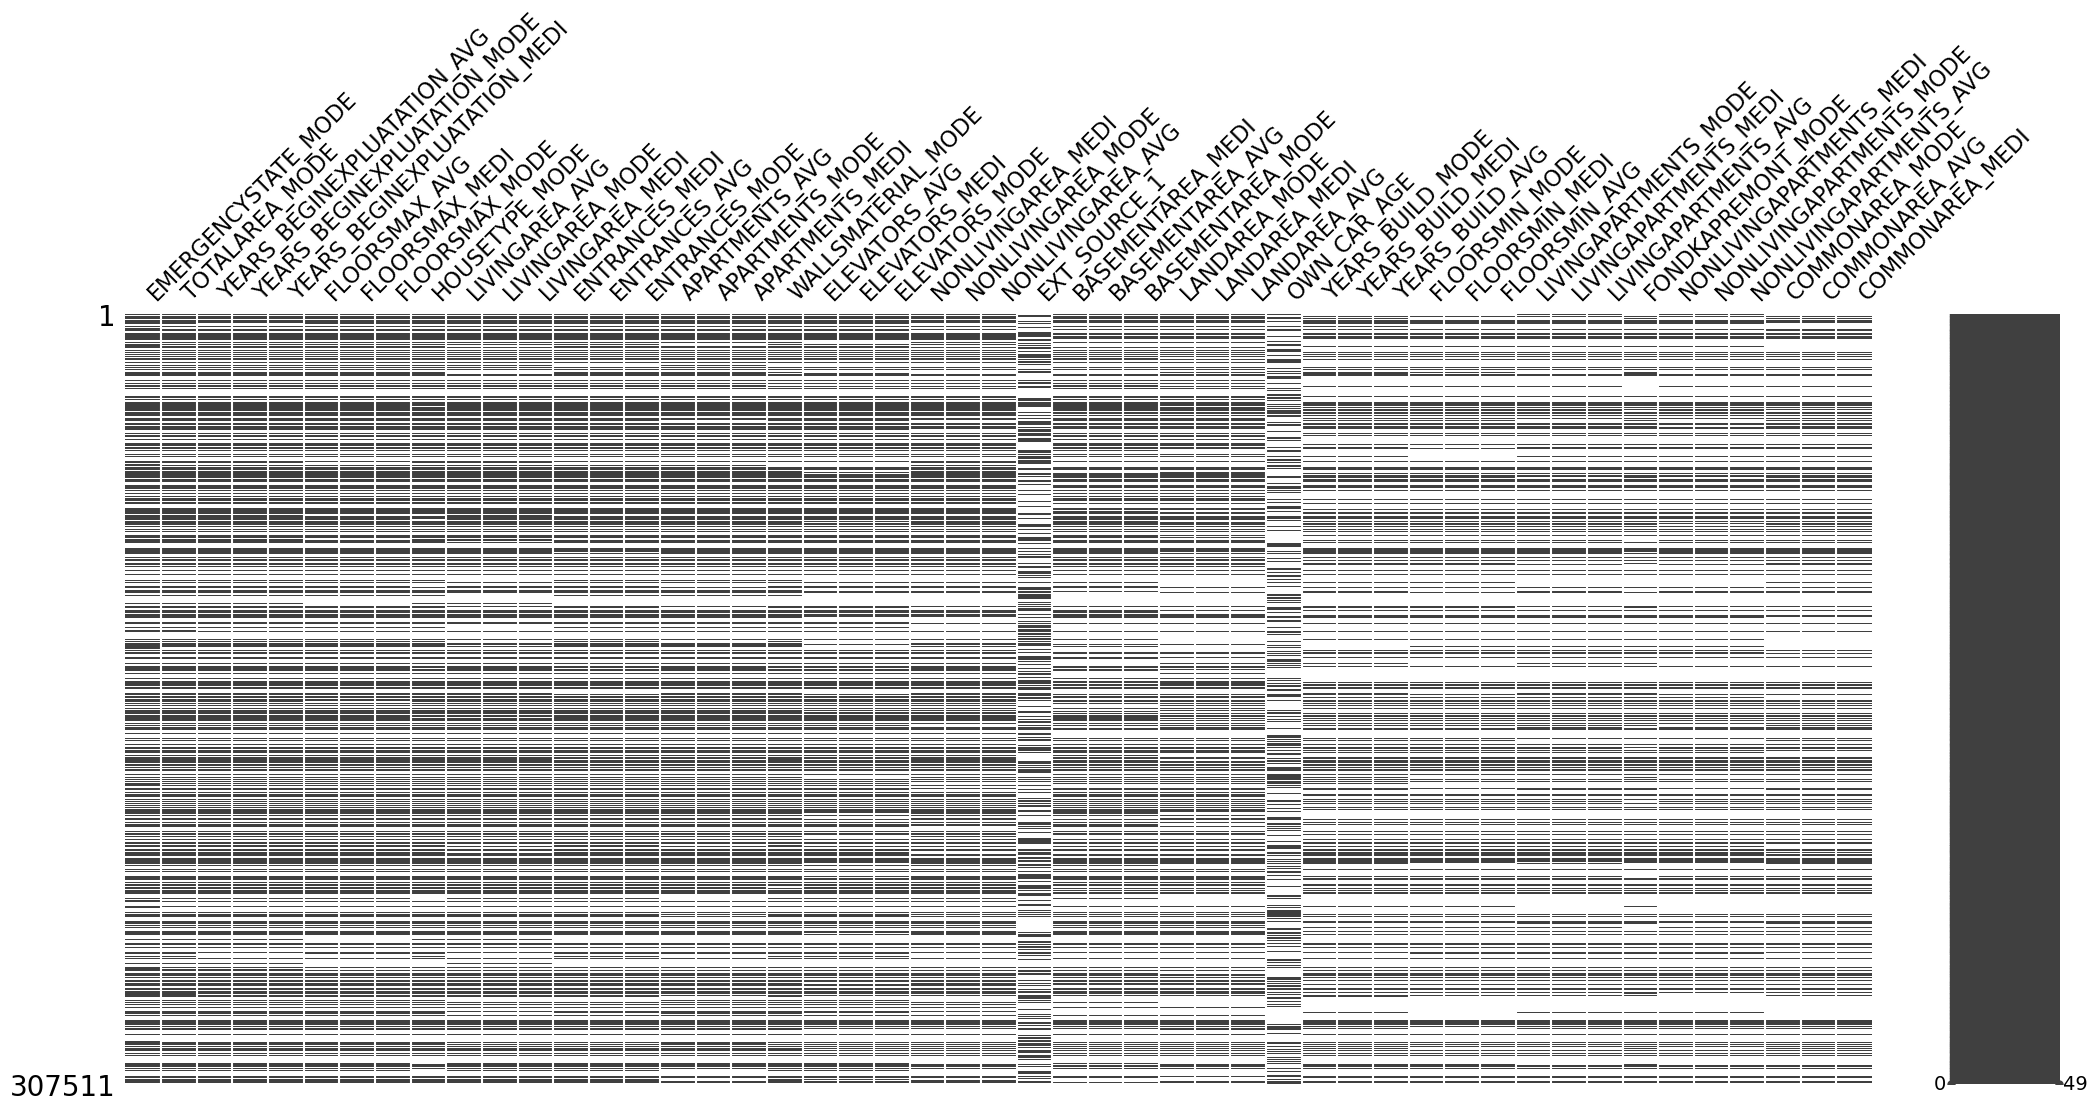

In [15]:
msno.matrix(df[cols_missing_more_40_percent]);

Dropping all the rows with even one missing values

In [16]:
df_dropped_na = df.dropna(axis=0, how="any")

In [17]:
df.shape[0] - df_dropped_na.shape[0]

298909

In [18]:
round(((df.shape[0] - df_dropped_na.shape[0])/df.shape[0])*100,2)

97.2

In [19]:
df_dropped_na.shape

(8602, 121)

In [20]:
df_dropped_na['TARGET'].value_counts()

0    8076
1     526
Name: TARGET, dtype: int64

Dropping all the rows with all missing values for specific columns

In [21]:
df_dropped_na_controlled = df.dropna(subset = cols_missing_more_40_percent,axis=0, how="all")

In [22]:
df.shape[0] - df_dropped_na_controlled.shape[0]

56111

In [23]:
round(((df.shape[0] - df_dropped_na_controlled.shape[0])/df.shape[0])*100,2)

18.25

In [24]:
nulls_df_after_rows_removed = create_nulls_df(df_dropped_na_controlled)
nulls_df_after_rows_removed

,column,null_values,nulls_percent
60,DAYS_LAST_PHONE_CHANGE,1,0.00
5,CNT_FAM_MEMBERS,2,0.00
0,AMT_ANNUITY,10,0.00
1,AMT_GOODS_PRICE,198,0.06
7,EXT_SOURCE_2,491,0.16
59,DEF_60_CNT_SOCIAL_CIRCLE,905,0.29
58,OBS_60_CNT_SOCIAL_CIRCLE,905,0.29
57,DEF_30_CNT_SOCIAL_CIRCLE,905,0.29
56,OBS_30_CNT_SOCIAL_CIRCLE,905,0.29
2,NAME_TYPE_SUITE,1060,0.34


In [25]:
cols_to_remove = nulls_df_after_rows_removed[nulls_df_after_rows_removed['nulls_percent'] > 45]['column'].to_list()
print(cols_to_remove)

['OWN_CAR_AGE', 'YEARS_BUILD_MODE', 'YEARS_BUILD_MEDI', 'YEARS_BUILD_AVG', 'FLOORSMIN_MODE', 'FLOORSMIN_MEDI', 'FLOORSMIN_AVG', 'LIVINGAPARTMENTS_MODE', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAPARTMENTS_AVG', 'FONDKAPREMONT_MODE', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAPARTMENTS_AVG', 'COMMONAREA_MODE', 'COMMONAREA_AVG', 'COMMONAREA_MEDI']


In [26]:
len(cols_to_remove)

17

In [27]:
df = df.drop(cols_to_remove, axis = 1)

In [28]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
(df.shape[1] + len(cols_to_remove) + 1) == (data_main.shape[1])

True

In [30]:
null_columns_list = df.isnull().sum()[df.isnull().sum() > 0].index.to_list()
print(null_columns_list)

['AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'LANDAREA_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'LANDAREA_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'LANDAREA_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAREA_MEDI', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE', 'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_

In [31]:
obj_type_cols = df.select_dtypes(include='object').columns
print(obj_type_cols)

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'HOUSETYPE_MODE',
       'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')


In [32]:
null_obj_cols = list(set(obj_type_cols).intersection(set(null_columns_list)) )
print(null_obj_cols)

['NAME_TYPE_SUITE', 'HOUSETYPE_MODE', 'OCCUPATION_TYPE', 'EMERGENCYSTATE_MODE', 'WALLSMATERIAL_MODE']


In [33]:
df[null_obj_cols].head()

,NAME_TYPE_SUITE,HOUSETYPE_MODE,OCCUPATION_TYPE,EMERGENCYSTATE_MODE,WALLSMATERIAL_MODE
0,Unaccompanied,block of flats,Laborers,No,"Stone, brick"
1,Family,block of flats,Core staff,No,Block
2,Unaccompanied,NaN,Laborers,NaN,NaN
3,Unaccompanied,NaN,Laborers,NaN,NaN
4,Unaccompanied,NaN,Core staff,NaN,NaN


In [34]:
def unique_value_and_counts(dataframe):
    result = dict()
    for col in dataframe.columns:
        unique_counts = ('UNIQUE_COUNTS', dataframe[col].nunique())
        value = list(zip(dataframe[col].value_counts().index, dataframe[col].value_counts()))
        value.insert(0, unique_counts)
        result[col] = value
    return result     

In [35]:
df[null_obj_cols].isnull().sum()

NAME_TYPE_SUITE          1292
HOUSETYPE_MODE         154297
OCCUPATION_TYPE         96391
EMERGENCYSTATE_MODE    145755
WALLSMATERIAL_MODE     156341
dtype: int64

In [36]:
df[null_obj_cols].columns

Index(['NAME_TYPE_SUITE', 'HOUSETYPE_MODE', 'OCCUPATION_TYPE',
       'EMERGENCYSTATE_MODE', 'WALLSMATERIAL_MODE'],
      dtype='object')

In [37]:
temp = unique_value_and_counts(df[null_obj_cols])
temp

{'NAME_TYPE_SUITE': [('UNIQUE_COUNTS', 7),
  ('Unaccompanied', 248526),
  ('Family', 40149),
  ('Spouse, partner', 11370),
  ('Children', 3267),
  ('Other_B', 1770),
  ('Other_A', 866),
  ('Group of people', 271)],
 'HOUSETYPE_MODE': [('UNIQUE_COUNTS', 3),
  ('block of flats', 150503),
  ('specific housing', 1499),
  ('terraced house', 1212)],
 'OCCUPATION_TYPE': [('UNIQUE_COUNTS', 18),
  ('Laborers', 55186),
  ('Sales staff', 32102),
  ('Core staff', 27570),
  ('Managers', 21371),
  ('Drivers', 18603),
  ('High skill tech staff', 11380),
  ('Accountants', 9813),
  ('Medicine staff', 8537),
  ('Security staff', 6721),
  ('Cooking staff', 5946),
  ('Cleaning staff', 4653),
  ('Private service staff', 2652),
  ('Low-skill Laborers', 2093),
  ('Waiters/barmen staff', 1348),
  ('Secretaries', 1305),
  ('Realty agents', 751),
  ('HR staff', 563),
  ('IT staff', 526)],
 'EMERGENCYSTATE_MODE': [('UNIQUE_COUNTS', 2), ('No', 159428), ('Yes', 2328)],
 'WALLSMATERIAL_MODE': [('UNIQUE_COUNTS', 7),

In [38]:
df[null_obj_cols].mode()

,NAME_TYPE_SUITE,HOUSETYPE_MODE,OCCUPATION_TYPE,EMERGENCYSTATE_MODE,WALLSMATERIAL_MODE
0,Unaccompanied,block of flats,Laborers,No,Panel


In [39]:
df[null_obj_cols] = df[null_obj_cols].fillna(df[null_obj_cols].mode().iloc[0])

In [40]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
numerical_cols = df.dtypes[df.dtypes != "object"]
numerical_cols

TARGET                            int64
CNT_CHILDREN                      int64
AMT_INCOME_TOTAL                float64
AMT_CREDIT                      float64
AMT_ANNUITY                     float64
AMT_GOODS_PRICE                 float64
REGION_POPULATION_RELATIVE      float64
DAYS_BIRTH                        int64
DAYS_EMPLOYED                     int64
DAYS_REGISTRATION               float64
DAYS_ID_PUBLISH                   int64
FLAG_MOBIL                        int64
FLAG_EMP_PHONE                    int64
FLAG_WORK_PHONE                   int64
FLAG_CONT_MOBILE                  int64
FLAG_PHONE                        int64
FLAG_EMAIL                        int64
CNT_FAM_MEMBERS                 float64
REGION_RATING_CLIENT              int64
REGION_RATING_CLIENT_W_CITY       int64
HOUR_APPR_PROCESS_START           int64
REG_REGION_NOT_LIVE_REGION        int64
REG_REGION_NOT_WORK_REGION        int64
LIVE_REGION_NOT_WORK_REGION       int64
REG_CITY_NOT_LIVE_CITY            int64


In [42]:
null_num_cols = list(set(null_columns_list).intersection(set(numerical_cols.index)))
print(null_num_cols)

['YEARS_BEGINEXPLUATATION_AVG', 'AMT_ANNUITY', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'LANDAREA_AVG', 'TOTALAREA_MODE', 'AMT_GOODS_PRICE', 'ENTRANCES_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'LIVINGAREA_MEDI', 'EXT_SOURCE_1', 'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NONLIVINGAREA_AVG', 'AMT_REQ_CREDIT_BUREAU_MON', 'BASEMENTAREA_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'LANDAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'APARTMENTS_AVG', 'LIVINGAREA_AVG', 'ENTRANCES_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'LIVINGAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'NONLIVINGAREA_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'BASEMENTAREA_AVG', 'LANDAREA_MEDI', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'OBS_30_CNT_SOCIAL_CIRCLE', 'ELEVATORS_AVG']


In [43]:
continuous_null_value_cols = [col for col in null_num_cols if ~df[col].isin([0,1, 0.0,1.0]).all()]
print(continuous_null_value_cols)

['YEARS_BEGINEXPLUATATION_AVG', 'AMT_ANNUITY', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'LANDAREA_AVG', 'TOTALAREA_MODE', 'AMT_GOODS_PRICE', 'ENTRANCES_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'LIVINGAREA_MEDI', 'EXT_SOURCE_1', 'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'NONLIVINGAREA_AVG', 'AMT_REQ_CREDIT_BUREAU_MON', 'BASEMENTAREA_MEDI', 'OBS_60_CNT_SOCIAL_CIRCLE', 'CNT_FAM_MEMBERS', 'LANDAREA_MODE', 'AMT_REQ_CREDIT_BUREAU_QRT', 'AMT_REQ_CREDIT_BUREAU_YEAR', 'APARTMENTS_AVG', 'LIVINGAREA_AVG', 'ENTRANCES_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'LIVINGAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'NONLIVINGAREA_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'DEF_60_CNT_SOCIAL_CIRCLE', 'BASEMENTAREA_AVG', 'LANDAREA_MEDI', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'OBS_30_CNT_SOCIAL_CIRCLE', 'ELEVATORS_AVG']


In [44]:
zero_and_one_value_cols = [col for col in null_num_cols if df[col].isin([0,1, 0.0,1.0]).all()]
print(zero_and_one_value_cols)

[]


In [45]:
len(continuous_null_value_cols) + len(null_obj_cols) == len(null_columns_list)

True

In [46]:
temp = unique_value_and_counts(df[continuous_null_value_cols])

In [47]:
for key in temp.keys():
    if temp[key][0][1]<10:
        print(f'{key}: {temp[key]}')

AMT_REQ_CREDIT_BUREAU_DAY: [('UNIQUE_COUNTS', 9), (0.0, 264503), (1.0, 1292), (2.0, 106), (3.0, 45), (4.0, 26), (5.0, 9), (6.0, 8), (9.0, 2), (8.0, 1)]
AMT_REQ_CREDIT_BUREAU_HOUR: [('UNIQUE_COUNTS', 5), (0.0, 264366), (1.0, 1560), (2.0, 56), (3.0, 9), (4.0, 1)]
DEF_60_CNT_SOCIAL_CIRCLE: [('UNIQUE_COUNTS', 9), (0.0, 280721), (1.0, 21841), (2.0, 3170), (3.0, 598), (4.0, 135), (5.0, 20), (6.0, 3), (7.0, 1), (24.0, 1)]
AMT_REQ_CREDIT_BUREAU_WEEK: [('UNIQUE_COUNTS', 9), (0.0, 257456), (1.0, 8208), (2.0, 199), (3.0, 58), (4.0, 34), (6.0, 20), (5.0, 10), (8.0, 5), (7.0, 2)]


In [48]:
df[continuous_null_value_cols].to_csv("output.csv", index=False) 

In [49]:
# From the "output.csv" inspection, the following are the columns which are having discrete values.

discrete_nulls_column = ["AMT_REQ_CREDIT_BUREAU_QRT","DEF_60_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_MON",
                         "OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","AMT_REQ_CREDIT_BUREAU_YEAR",
                         "CNT_FAM_MEMBERS","AMT_REQ_CREDIT_BUREAU_HOUR","OBS_60_CNT_SOCIAL_CIRCLE",
                         "AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY"]

In [50]:
continuous_nulls_column = list(set(continuous_null_value_cols).difference(set(discrete_nulls_column)))
print(continuous_nulls_column)

['YEARS_BEGINEXPLUATATION_AVG', 'AMT_ANNUITY', 'FLOORSMAX_AVG', 'YEARS_BEGINEXPLUATATION_MEDI', 'LANDAREA_AVG', 'TOTALAREA_MODE', 'AMT_GOODS_PRICE', 'ENTRANCES_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'ELEVATORS_MODE', 'ELEVATORS_MEDI', 'LIVINGAREA_MEDI', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'NONLIVINGAREA_AVG', 'BASEMENTAREA_MEDI', 'LANDAREA_MODE', 'APARTMENTS_AVG', 'LIVINGAREA_AVG', 'ENTRANCES_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'ENTRANCES_MEDI', 'LIVINGAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'EXT_SOURCE_3', 'DAYS_LAST_PHONE_CHANGE', 'NONLIVINGAREA_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMAX_MODE', 'BASEMENTAREA_AVG', 'LANDAREA_MEDI', 'ELEVATORS_AVG']


In [51]:
df[discrete_nulls_column] = df[discrete_nulls_column].fillna(df[discrete_nulls_column].mode().iloc[0])

In [52]:
df[continuous_nulls_column] = df[continuous_nulls_column].fillna(df[continuous_nulls_column].median())

In [53]:
df.isnull().any().sum()

0

In [54]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


### Print percentage of default to payer of the dataset for the TARGET column

In [55]:
target_dist = df["TARGET"].value_counts()
target_dist

0    282686
1     24825
Name: TARGET, dtype: int64

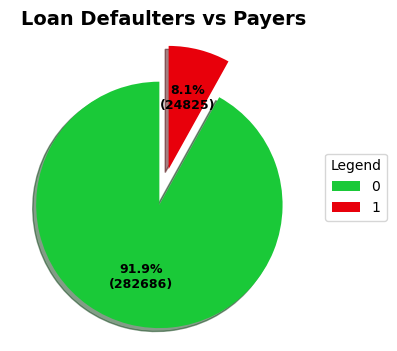

In [56]:
fig, ax = plt.subplots(figsize=[12,4])

labels = target_dist.index
data = target_dist.values
title = "Loan Defaulters vs Payers"
colors = sns.color_palette('bright')[2:4]


def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

wedges, texts, autopcts = ax.pie(x= data, 
                                 autopct=lambda pct: func(pct, data), 
                                 explode=[0.15]*len(data), 
                                 shadow=True, 
                                 startangle = 90,
                                 colors = colors
                                 )
# Adding legend
ax.legend(wedges, labels,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autopcts, **{'color':'black', 'weight':'bold', 'fontsize':9})
plt.title(title, fontsize=14, fontweight="bold");


### Encode the columns that is required for the model

In [57]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df_objects = df.select_dtypes(include = 'object')
df_objects.head()

,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,OCCUPATION_TYPE,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE,HOUSETYPE_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE
0,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,"Stone, brick",No
1,Cash loans,F,N,N,Family,State servant,Higher education,Married,House / apartment,Core staff,MONDAY,School,block of flats,Block,No
2,Revolving loans,M,Y,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Laborers,MONDAY,Government,block of flats,Panel,No
3,Cash loans,F,N,Y,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,Laborers,WEDNESDAY,Business Entity Type 3,block of flats,Panel,No
4,Cash loans,M,N,Y,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,Core staff,THURSDAY,Religion,block of flats,Panel,No


In [59]:
encoded_obj_df = pd.get_dummies(df_objects,
                                drop_first = True)
encoded_obj_df.head()

,NAME_CONTRACT_TYPE_Revolving loans,CODE_GENDER_M,CODE_GENDER_XNA,FLAG_OWN_CAR_Y,FLAG_OWN_REALTY_Y,NAME_TYPE_SUITE_Family,NAME_TYPE_SUITE_Group of people,NAME_TYPE_SUITE_Other_A,NAME_TYPE_SUITE_Other_B,"NAME_TYPE_SUITE_Spouse, partner",...,ORGANIZATION_TYPE_XNA,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
0,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [60]:
encoded_obj_df.isnull().any().sum()

0

In [61]:
df_processed_non_obj_cols = df.select_dtypes(exclude = 'object')
df_processed_non_obj_cols.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
df_processed = pd.merge(left = df_processed_non_obj_cols,
                         right = encoded_obj_df,
                         how = 'inner',
                         left_index = True,
                         right_index = True
                        )
df_processed.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,ORGANIZATION_TYPE_XNA,HOUSETYPE_MODE_specific housing,HOUSETYPE_MODE_terraced house,WALLSMATERIAL_MODE_Mixed,WALLSMATERIAL_MODE_Monolithic,WALLSMATERIAL_MODE_Others,WALLSMATERIAL_MODE_Panel,"WALLSMATERIAL_MODE_Stone, brick",WALLSMATERIAL_MODE_Wooden,EMERGENCYSTATE_MODE_Yes
0,1,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,135000.0,312682.5,29686.5,297000.0,0.008019,-19005,-3039,-9833.0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,121500.0,513000.0,21865.5,513000.0,0.028663,-19932,-3038,-4311.0,...,0,0,0,0,0,0,1,0,0,0


In [63]:
df_processed_non_obj_cols.shape, encoded_obj_df.shape

((307511, 89), (307511, 121))

In [64]:
df_processed.shape

(307511, 210)

### Balance the dataset if the data is imbalanced

In [65]:
df_processed.duplicated().sum()

0

#### Splitting of the dataset

In [66]:
X_cols = df_processed.columns[1:]
print(X_cols)

Index(['CNT_CHILDREN', 'AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY',
       'AMT_GOODS_PRICE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH',
       ...
       'ORGANIZATION_TYPE_XNA', 'HOUSETYPE_MODE_specific housing',
       'HOUSETYPE_MODE_terraced house', 'WALLSMATERIAL_MODE_Mixed',
       'WALLSMATERIAL_MODE_Monolithic', 'WALLSMATERIAL_MODE_Others',
       'WALLSMATERIAL_MODE_Panel', 'WALLSMATERIAL_MODE_Stone, brick',
       'WALLSMATERIAL_MODE_Wooden', 'EMERGENCYSTATE_MODE_Yes'],
      dtype='object', length=209)


In [67]:
X = df_processed.drop('TARGET', axis = 1).values
y = df_processed['TARGET'].values

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [69]:
X_train.shape, y_train.shape

((215257, 209), (215257,))

In [70]:
X_test.shape, y_test.shape

((92254, 209), (92254,))

In [71]:
np.unique(y_train)

array([0, 1], dtype=int64)

In [72]:
np.unique(y_test)

array([0, 1], dtype=int64)

In [73]:
train_target_dist = pd.Series(Counter(y_train))
train_target_dist

0    197795
1     17462
dtype: int64

In [74]:
test_target_dist = pd.Series(Counter(y_test))
test_target_dist

0    84891
1     7363
dtype: int64

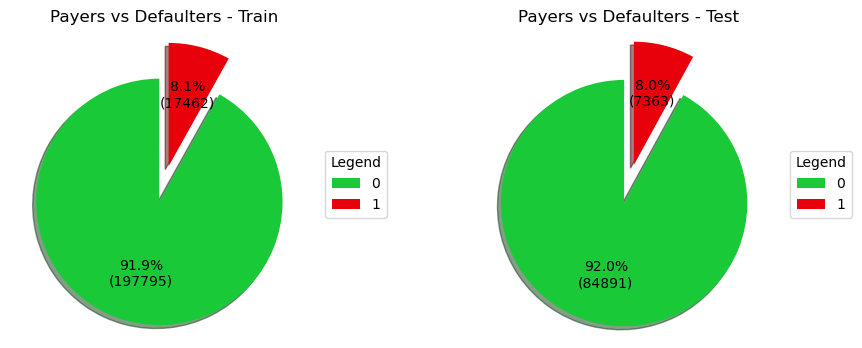

In [75]:
fig, (ax1, ax2) = plt.subplots(nrows=1,
                       ncols=2,
                       figsize=[11,4])

labels_1 = train_target_dist.index
data_1 = train_target_dist.values
title_1 = "Payers vs Defaulters - Train"

labels_2 = test_target_dist.index
data_2 = test_target_dist.values
title_2 = "Payers vs Defaulters - Test"

colors = sns.color_palette('bright')[2:4]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

wedges_1, texts_1, autopcts_1 = ax1.pie(x= data_1, 
                                         autopct=lambda pct: func(pct, data_1), 
                                         explode=[0.15]*len(data_1), 
                                         shadow=True, 
                                         startangle = 90,
                                         colors = colors
                                         )

wedges_2, texts_2, autopcts_2 = ax2.pie(x= data_2, 
                                         autopct=lambda pct: func(pct, data_2), 
                                         explode=[0.16]*len(data_2), 
                                         shadow=True, 
                                         startangle = 90,
                                         colors = colors
                                         )

# Adding legend
ax1.legend(wedges_1, labels_1,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax2.legend(wedges_2, labels_2,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':9})

ax1.set_title(title_1, fontsize=12)
ax2.set_title(title_2, fontsize=12)
plt.show()
#fig.suptitle('Distributions', fontsize=14, fontweight="bold");

In [76]:
oversampler = RandomOverSampler(sampling_strategy = 0.70, random_state=150)

X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train,y_train)

print(f"The number of classes before fit {Counter(y_train)}")
print(f"The number of classes after fit {Counter(y_train_oversampled)}")

The number of classes before fit Counter({0: 197795, 1: 17462})
The number of classes after fit Counter({0: 197795, 1: 138456})


In [77]:
X_train.shape, y_train.shape

((215257, 209), (215257,))

In [78]:
X_train_oversampled.shape, y_train_oversampled.shape

((336251, 209), (336251,))

In [79]:
before_oversampling_train_target = pd.Series(Counter(y_train))
after_oversampling_train_target = pd.Series(Counter(y_train_oversampled))

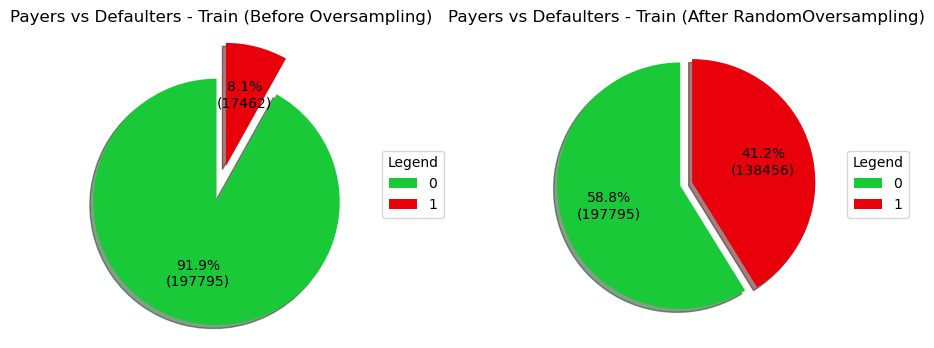

In [80]:
fig, (ax1, ax2) = plt.subplots(nrows=1,
                       ncols=2,
                       figsize=[11,4])

labels_1 = before_oversampling_train_target.index
data_1 = before_oversampling_train_target.values
title_1 = "Payers vs Defaulters - Train (Before Oversampling)"

labels_2 = after_oversampling_train_target.index
data_2 = after_oversampling_train_target.values
title_2 = "Payers vs Defaulters - Train (After RandomOversampling)"

colors = sns.color_palette('bright')[2:4]

def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

wedges_1, texts_1, autopcts_1 = ax1.pie(x= data_1, 
                                         autopct=lambda pct: func(pct, data_1), 
                                         explode=[0.15]*len(data_1), 
                                         shadow=True, 
                                         startangle = 90,
                                         colors = colors
                                         )

wedges_2, texts_2, autopcts_2 = ax2.pie(x= data_2, 
                                         autopct=lambda pct: func(pct, data_2), 
                                         explode=[0.05]*len(data_2), 
                                         shadow=True, 
                                         startangle = 90,
                                         colors = colors
                                         )

# Adding legend
ax1.legend(wedges_1, labels_1,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))

ax2.legend(wedges_2, labels_2,
          title ="Legend",
          loc ="center left",
          bbox_to_anchor =(1, 0, 0.5, 1))
plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize':9})

ax1.set_title(title_1, fontsize=12)
ax2.set_title(title_2, fontsize=12)
plt.show()
#fig.suptitle('Distributions', fontsize=14, fontweight="bold");

### Building the ANN Model

In [81]:
scaler = MinMaxScaler()

X_train_original = scaler.fit_transform(X_train)
X_test_original = scaler.transform(X_test)

In [82]:
scaler_random_oversampling = MinMaxScaler()

X_train_oversampled = scaler_random_oversampling.fit_transform(X_train_oversampled)
X_test_random = scaler_random_oversampling.transform(X_test)

In [83]:
y_train = y_train.astype('int64')
y_test = y_test.astype('int64')
y_train_oversampled = y_train_oversampled.astype('int64')

In [84]:
# Initialising the ANN
classifier_random_oversampled = Sequential()

# Adding the input layer and the first hidden layer
classifier_random_oversampled.add(Dense(110, kernel_initializer = 'he_uniform',activation='relu',input_dim = 209))

# Adding the second hidden layer
classifier_random_oversampled.add(Dense(55, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier_random_oversampled.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier_random_oversampled.compile(optimizer = 'Adam', 
                                      loss = 'binary_crossentropy', 
                                      metrics = ['accuracy'])

In [85]:
# Fitting the ANN to the Training set
model_history_random = classifier_random_oversampled.fit(x = X_train_oversampled, 
                                                       y = y_train_oversampled, 
                                                       validation_data = (X_test_random, y_test), 
                                                       batch_size = 50000, 
                                                       epochs = 300)

Epoch 1/300
7/7 [==============================] - 11s 731ms/step - loss: 0.6842 - accuracy: 0.5796 - val_loss: 0.5718 - val_accuracy: 0.8423
Epoch 2/300
7/7 [==============================] - 3s 468ms/step - loss: 0.6573 - accuracy: 0.6039 - val_loss: 0.5197 - val_accuracy: 0.8497
Epoch 3/300
7/7 [==============================] - 3s 460ms/step - loss: 0.6432 - accuracy: 0.6325 - val_loss: 0.5303 - val_accuracy: 0.7822
Epoch 4/300
7/7 [==============================] - 3s 473ms/step - loss: 0.6322 - accuracy: 0.6458 - val_loss: 0.5385 - val_accuracy: 0.7597
Epoch 5/300
7/7 [==============================] - 3s 461ms/step - loss: 0.6217 - accuracy: 0.6560 - val_loss: 0.5040 - val_accuracy: 0.8024
Epoch 6/300
7/7 [==============================] - 3s 453ms/step - loss: 0.6111 - accuracy: 0.6667 - val_loss: 0.5047 - val_accuracy: 0.7943
Epoch 7/300
7/7 [==============================] - 3s 452ms/step - loss: 0.6015 - accuracy: 0.6762 - val_loss: 0.5001 - val_accuracy: 0.7886
Epoch 8/300


Epoch 59/300
7/7 [==============================] - 3s 458ms/step - loss: 0.5276 - accuracy: 0.7327 - val_loss: 0.4700 - val_accuracy: 0.7805
Epoch 60/300
7/7 [==============================] - 3s 455ms/step - loss: 0.5265 - accuracy: 0.7333 - val_loss: 0.4870 - val_accuracy: 0.7668
Epoch 61/300
7/7 [==============================] - 3s 457ms/step - loss: 0.5256 - accuracy: 0.7341 - val_loss: 0.4625 - val_accuracy: 0.7854
Epoch 62/300
7/7 [==============================] - 3s 457ms/step - loss: 0.5248 - accuracy: 0.7345 - val_loss: 0.4868 - val_accuracy: 0.7667
Epoch 63/300
7/7 [==============================] - 3s 449ms/step - loss: 0.5239 - accuracy: 0.7353 - val_loss: 0.4618 - val_accuracy: 0.7855
Epoch 64/300
7/7 [==============================] - 3s 457ms/step - loss: 0.5230 - accuracy: 0.7360 - val_loss: 0.4944 - val_accuracy: 0.7613
Epoch 65/300
7/7 [==============================] - 3s 455ms/step - loss: 0.5218 - accuracy: 0.7369 - val_loss: 0.4951 - val_accuracy: 0.7604
Epoch 

7/7 [==============================] - 3s 452ms/step - loss: 0.4875 - accuracy: 0.7599 - val_loss: 0.4481 - val_accuracy: 0.7941
Epoch 117/300
7/7 [==============================] - 3s 450ms/step - loss: 0.4872 - accuracy: 0.7598 - val_loss: 0.4719 - val_accuracy: 0.7768
Epoch 118/300
7/7 [==============================] - 3s 461ms/step - loss: 0.4873 - accuracy: 0.7602 - val_loss: 0.4693 - val_accuracy: 0.7784
Epoch 119/300
7/7 [==============================] - 3s 460ms/step - loss: 0.4863 - accuracy: 0.7607 - val_loss: 0.4574 - val_accuracy: 0.7876
Epoch 120/300
7/7 [==============================] - 3s 458ms/step - loss: 0.4859 - accuracy: 0.7608 - val_loss: 0.4855 - val_accuracy: 0.7666
Epoch 121/300
7/7 [==============================] - 3s 452ms/step - loss: 0.4849 - accuracy: 0.7615 - val_loss: 0.4517 - val_accuracy: 0.7921
Epoch 122/300
7/7 [==============================] - 3s 468ms/step - loss: 0.4846 - accuracy: 0.7618 - val_loss: 0.4802 - val_accuracy: 0.7711
Epoch 123/300

7/7 [==============================] - 4s 515ms/step - loss: 0.4643 - accuracy: 0.7753 - val_loss: 0.4932 - val_accuracy: 0.7635
Epoch 174/300
7/7 [==============================] - 4s 569ms/step - loss: 0.4638 - accuracy: 0.7756 - val_loss: 0.4638 - val_accuracy: 0.7846
Epoch 175/300
7/7 [==============================] - 3s 476ms/step - loss: 0.4632 - accuracy: 0.7757 - val_loss: 0.5010 - val_accuracy: 0.7584
Epoch 176/300
7/7 [==============================] - 3s 457ms/step - loss: 0.4632 - accuracy: 0.7762 - val_loss: 0.4505 - val_accuracy: 0.7948
Epoch 177/300
7/7 [==============================] - 3s 456ms/step - loss: 0.4647 - accuracy: 0.7747 - val_loss: 0.4583 - val_accuracy: 0.7888
Epoch 178/300
7/7 [==============================] - 3s 460ms/step - loss: 0.4631 - accuracy: 0.7762 - val_loss: 0.5213 - val_accuracy: 0.7451
Epoch 179/300
7/7 [==============================] - 3s 457ms/step - loss: 0.4633 - accuracy: 0.7762 - val_loss: 0.4511 - val_accuracy: 0.7946
Epoch 180/300

7/7 [==============================] - 3s 477ms/step - loss: 0.4484 - accuracy: 0.7860 - val_loss: 0.4649 - val_accuracy: 0.7876
Epoch 231/300
7/7 [==============================] - 4s 572ms/step - loss: 0.4477 - accuracy: 0.7863 - val_loss: 0.4926 - val_accuracy: 0.7687
Epoch 232/300
7/7 [==============================] - 3s 452ms/step - loss: 0.4487 - accuracy: 0.7859 - val_loss: 0.4954 - val_accuracy: 0.7669
Epoch 233/300
7/7 [==============================] - 3s 468ms/step - loss: 0.4481 - accuracy: 0.7862 - val_loss: 0.4678 - val_accuracy: 0.7860
Epoch 234/300
7/7 [==============================] - 3s 452ms/step - loss: 0.4488 - accuracy: 0.7851 - val_loss: 0.5144 - val_accuracy: 0.7540
Epoch 235/300
7/7 [==============================] - 3s 447ms/step - loss: 0.4489 - accuracy: 0.7856 - val_loss: 0.4450 - val_accuracy: 0.8020
Epoch 236/300
7/7 [==============================] - 3s 455ms/step - loss: 0.4476 - accuracy: 0.7860 - val_loss: 0.4977 - val_accuracy: 0.7655
Epoch 237/300

7/7 [==============================] - 3s 447ms/step - loss: 0.4379 - accuracy: 0.7919 - val_loss: 0.5133 - val_accuracy: 0.7586
Epoch 288/300
7/7 [==============================] - 3s 458ms/step - loss: 0.4375 - accuracy: 0.7927 - val_loss: 0.4709 - val_accuracy: 0.7865
Epoch 289/300
7/7 [==============================] - 3s 447ms/step - loss: 0.4362 - accuracy: 0.7930 - val_loss: 0.4973 - val_accuracy: 0.7692
Epoch 290/300
7/7 [==============================] - 3s 454ms/step - loss: 0.4359 - accuracy: 0.7936 - val_loss: 0.4916 - val_accuracy: 0.7730
Epoch 291/300
7/7 [==============================] - 3s 452ms/step - loss: 0.4362 - accuracy: 0.7938 - val_loss: 0.4709 - val_accuracy: 0.7873
Epoch 292/300
7/7 [==============================] - 3s 449ms/step - loss: 0.4354 - accuracy: 0.7937 - val_loss: 0.4906 - val_accuracy: 0.7739
Epoch 293/300
7/7 [==============================] - 3s 452ms/step - loss: 0.4354 - accuracy: 0.7943 - val_loss: 0.5008 - val_accuracy: 0.7666
Epoch 294/300

In [86]:
losses_random = pd.DataFrame(classifier_random_oversampled.history.history)
losses_random.head()

,loss,accuracy,val_loss,val_accuracy
0,0.684164,0.579609,0.571804,0.842262
1,0.657305,0.603936,0.519656,0.849741
2,0.643166,0.632486,0.530296,0.782199
3,0.632217,0.645839,0.538505,0.759674
4,0.621717,0.655959,0.503977,0.802426


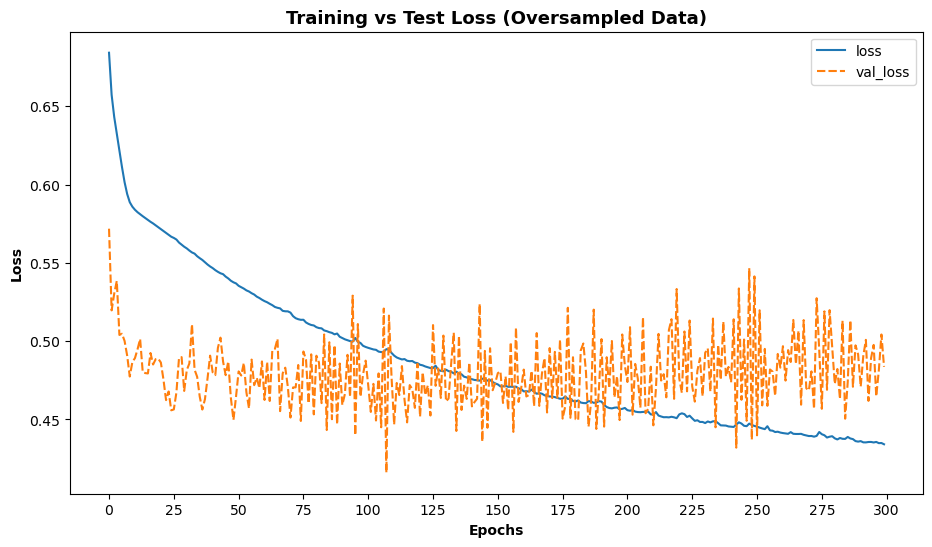

In [87]:
plt.figure(figsize=(11,6))
sns.lineplot(data = losses_random[['loss', 'val_loss']])
plt.title('Training vs Test Loss (Oversampled Data)', fontsize = 13, fontweight="bold")
plt.xlabel('Epochs', fontweight="bold")
plt.ylabel('Loss', fontweight="bold")

plt.xticks(range(0, 301, 25))

plt.show()

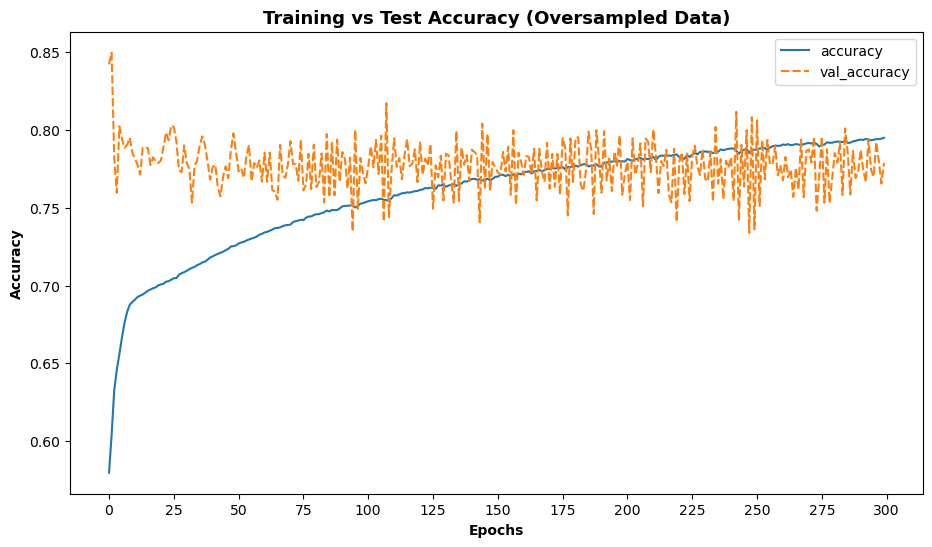

In [88]:
plt.figure(figsize=(11,6))
sns.lineplot(data = losses_random[['accuracy', 'val_accuracy']])
plt.title('Training vs Test Accuracy (Oversampled Data)', fontsize = 13, fontweight="bold")
plt.xlabel('Epochs', fontweight="bold")
plt.ylabel('Accuracy', fontweight="bold")

plt.xticks(range(0, 301, 25))

plt.show()

In [89]:
# Initialising the ANN
classifier_original_data = Sequential()

# Adding the input layer and the first hidden layer
classifier_original_data.add(Dense(110, kernel_initializer = 'he_uniform',activation='relu',input_dim = 209))

# Adding the second hidden layer
classifier_original_data.add(Dense(55, kernel_initializer = 'he_uniform',activation='relu'))

# Adding the output layer
classifier_original_data.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier_original_data.compile(optimizer = 'Adam', 
                                 loss = 'binary_crossentropy', 
                                 metrics = ['accuracy', tf.keras.metrics.Recall(thresholds=0)])

In [90]:
# Fitting the ANN to the Training set
model_history_original = classifier_original_data.fit(x = X_train_original, 
                                                       y = y_train, 
                                                       validation_data = (X_test_original, y_test), 
                                                       batch_size = 50000, 
                                                       epochs = 300)

Epoch 1/300
5/5 [==============================] - 6s 746ms/step - loss: 0.4056 - accuracy: 0.9184 - recall: 1.0000 - val_loss: 0.2959 - val_accuracy: 0.9202 - val_recall: 1.0000
Epoch 2/300
5/5 [==============================] - 3s 572ms/step - loss: 0.2933 - accuracy: 0.9189 - recall: 1.0000 - val_loss: 0.2970 - val_accuracy: 0.9202 - val_recall: 1.0000
Epoch 3/300
5/5 [==============================] - 2s 505ms/step - loss: 0.3054 - accuracy: 0.9189 - recall: 1.0000 - val_loss: 0.2975 - val_accuracy: 0.9202 - val_recall: 1.0000
Epoch 4/300
5/5 [==============================] - 2s 464ms/step - loss: 0.2963 - accuracy: 0.9189 - recall: 1.0000 - val_loss: 0.2814 - val_accuracy: 0.9202 - val_recall: 1.0000
Epoch 5/300
5/5 [==============================] - 3s 606ms/step - loss: 0.2828 - accuracy: 0.9189 - recall: 1.0000 - val_loss: 0.2786 - val_accuracy: 0.9202 - val_recall: 1.0000
Epoch 6/300
5/5 [==============================] - 2s 483ms/step - loss: 0.2821 - accuracy: 0.9189 - reca

5/5 [==============================] - 2s 436ms/step - loss: 0.2498 - accuracy: 0.9190 - recall: 1.0000 - val_loss: 0.2498 - val_accuracy: 0.9201 - val_recall: 1.0000
Epoch 47/300
5/5 [==============================] - 2s 441ms/step - loss: 0.2497 - accuracy: 0.9189 - recall: 1.0000 - val_loss: 0.2497 - val_accuracy: 0.9201 - val_recall: 1.0000
Epoch 48/300
5/5 [==============================] - 2s 429ms/step - loss: 0.2497 - accuracy: 0.9190 - recall: 1.0000 - val_loss: 0.2498 - val_accuracy: 0.9201 - val_recall: 1.0000
Epoch 49/300
5/5 [==============================] - 2s 433ms/step - loss: 0.2496 - accuracy: 0.9189 - recall: 1.0000 - val_loss: 0.2497 - val_accuracy: 0.9201 - val_recall: 1.0000
Epoch 50/300
5/5 [==============================] - 2s 449ms/step - loss: 0.2495 - accuracy: 0.9190 - recall: 1.0000 - val_loss: 0.2497 - val_accuracy: 0.9201 - val_recall: 1.0000
Epoch 51/300
5/5 [==============================] - 2s 444ms/step - loss: 0.2495 - accuracy: 0.9189 - recall: 1.0

5/5 [==============================] - 2s 436ms/step - loss: 0.2451 - accuracy: 0.9192 - recall: 1.0000 - val_loss: 0.2509 - val_accuracy: 0.9199 - val_recall: 1.0000
Epoch 92/300
5/5 [==============================] - 2s 433ms/step - loss: 0.2450 - accuracy: 0.9192 - recall: 1.0000 - val_loss: 0.2508 - val_accuracy: 0.9200 - val_recall: 1.0000
Epoch 93/300
5/5 [==============================] - 2s 449ms/step - loss: 0.2448 - accuracy: 0.9192 - recall: 1.0000 - val_loss: 0.2509 - val_accuracy: 0.9201 - val_recall: 1.0000
Epoch 94/300
5/5 [==============================] - 2s 433ms/step - loss: 0.2448 - accuracy: 0.9192 - recall: 1.0000 - val_loss: 0.2509 - val_accuracy: 0.9200 - val_recall: 1.0000
Epoch 95/300
5/5 [==============================] - 2s 433ms/step - loss: 0.2445 - accuracy: 0.9192 - recall: 1.0000 - val_loss: 0.2509 - val_accuracy: 0.9201 - val_recall: 1.0000
Epoch 96/300
5/5 [==============================] - 2s 449ms/step - loss: 0.2444 - accuracy: 0.9192 - recall: 1.0

5/5 [==============================] - 2s 441ms/step - loss: 0.2376 - accuracy: 0.9200 - recall: 1.0000 - val_loss: 0.2556 - val_accuracy: 0.9197 - val_recall: 1.0000
Epoch 137/300
5/5 [==============================] - 2s 437ms/step - loss: 0.2374 - accuracy: 0.9201 - recall: 1.0000 - val_loss: 0.2556 - val_accuracy: 0.9195 - val_recall: 1.0000
Epoch 138/300
5/5 [==============================] - 2s 445ms/step - loss: 0.2372 - accuracy: 0.9201 - recall: 1.0000 - val_loss: 0.2560 - val_accuracy: 0.9195 - val_recall: 1.0000
Epoch 139/300
5/5 [==============================] - 2s 437ms/step - loss: 0.2371 - accuracy: 0.9201 - recall: 1.0000 - val_loss: 0.2561 - val_accuracy: 0.9196 - val_recall: 1.0000
Epoch 140/300
5/5 [==============================] - 2s 449ms/step - loss: 0.2369 - accuracy: 0.9201 - recall: 1.0000 - val_loss: 0.2561 - val_accuracy: 0.9196 - val_recall: 1.0000
Epoch 141/300
5/5 [==============================] - 2s 437ms/step - loss: 0.2368 - accuracy: 0.9201 - recall

5/5 [==============================] - 2s 488ms/step - loss: 0.2305 - accuracy: 0.9212 - recall: 1.0000 - val_loss: 0.2622 - val_accuracy: 0.9179 - val_recall: 1.0000
Epoch 182/300
5/5 [==============================] - 2s 453ms/step - loss: 0.2307 - accuracy: 0.9212 - recall: 1.0000 - val_loss: 0.2622 - val_accuracy: 0.9187 - val_recall: 1.0000
Epoch 183/300
5/5 [==============================] - 2s 446ms/step - loss: 0.2302 - accuracy: 0.9212 - recall: 1.0000 - val_loss: 0.2620 - val_accuracy: 0.9185 - val_recall: 1.0000
Epoch 184/300
5/5 [==============================] - 2s 445ms/step - loss: 0.2300 - accuracy: 0.9214 - recall: 1.0000 - val_loss: 0.2622 - val_accuracy: 0.9182 - val_recall: 1.0000
Epoch 185/300
5/5 [==============================] - 2s 432ms/step - loss: 0.2299 - accuracy: 0.9214 - recall: 1.0000 - val_loss: 0.2625 - val_accuracy: 0.9184 - val_recall: 1.0000
Epoch 186/300
5/5 [==============================] - 2s 445ms/step - loss: 0.2300 - accuracy: 0.9214 - recall

5/5 [==============================] - 2s 437ms/step - loss: 0.2257 - accuracy: 0.9223 - recall: 1.0000 - val_loss: 0.2682 - val_accuracy: 0.9178 - val_recall: 1.0000
Epoch 227/300
5/5 [==============================] - 2s 433ms/step - loss: 0.2253 - accuracy: 0.9222 - recall: 1.0000 - val_loss: 0.2687 - val_accuracy: 0.9156 - val_recall: 1.0000
Epoch 228/300
5/5 [==============================] - 2s 441ms/step - loss: 0.2254 - accuracy: 0.9224 - recall: 1.0000 - val_loss: 0.2677 - val_accuracy: 0.9173 - val_recall: 1.0000
Epoch 229/300
5/5 [==============================] - 2s 433ms/step - loss: 0.2250 - accuracy: 0.9224 - recall: 1.0000 - val_loss: 0.2707 - val_accuracy: 0.9185 - val_recall: 1.0000
Epoch 230/300
5/5 [==============================] - 2s 449ms/step - loss: 0.2256 - accuracy: 0.9222 - recall: 1.0000 - val_loss: 0.2681 - val_accuracy: 0.9171 - val_recall: 1.0000
Epoch 231/300
5/5 [==============================] - 2s 437ms/step - loss: 0.2250 - accuracy: 0.9225 - recall

5/5 [==============================] - 2s 490ms/step - loss: 0.2210 - accuracy: 0.9232 - recall: 1.0000 - val_loss: 0.2730 - val_accuracy: 0.9166 - val_recall: 1.0000
Epoch 272/300
5/5 [==============================] - 2s 445ms/step - loss: 0.2206 - accuracy: 0.9233 - recall: 1.0000 - val_loss: 0.2732 - val_accuracy: 0.9160 - val_recall: 1.0000
Epoch 273/300
5/5 [==============================] - 2s 441ms/step - loss: 0.2205 - accuracy: 0.9233 - recall: 1.0000 - val_loss: 0.2733 - val_accuracy: 0.9163 - val_recall: 1.0000
Epoch 274/300
5/5 [==============================] - 2s 445ms/step - loss: 0.2204 - accuracy: 0.9234 - recall: 1.0000 - val_loss: 0.2735 - val_accuracy: 0.9164 - val_recall: 1.0000
Epoch 275/300
5/5 [==============================] - 2s 436ms/step - loss: 0.2205 - accuracy: 0.9233 - recall: 1.0000 - val_loss: 0.2738 - val_accuracy: 0.9144 - val_recall: 1.0000
Epoch 276/300
5/5 [==============================] - 2s 449ms/step - loss: 0.2206 - accuracy: 0.9235 - recall

In [91]:
losses_original = pd.DataFrame(classifier_original_data.history.history)
losses_original.head()

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
0,0.405591,0.918428,1.0,0.295858,0.920188,1.0
1,0.293270,0.918878,1.0,0.297042,0.920188,1.0
2,0.305420,0.918878,1.0,0.297491,0.920188,1.0
3,0.296261,0.918878,1.0,0.281415,0.920188,1.0
4,0.282822,0.918878,1.0,0.278570,0.920188,1.0


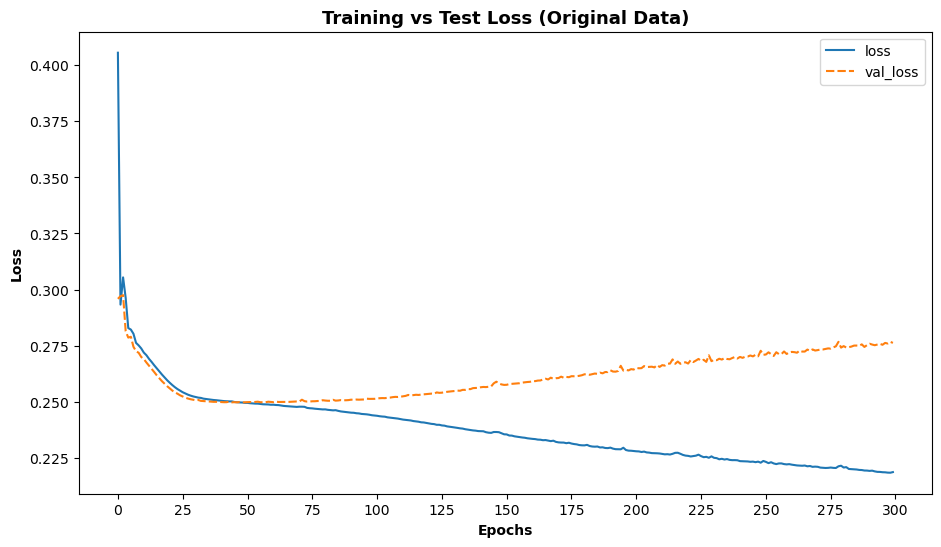

In [92]:
plt.figure(figsize=(11,6))
sns.lineplot(data = losses_original[['loss', 'val_loss']])
plt.title('Training vs Test Loss (Original Data)', fontsize = 13, fontweight="bold")
plt.xlabel('Epochs', fontweight="bold")
plt.ylabel('Loss', fontweight="bold")

plt.xticks(range(0, 301, 25))

plt.show()

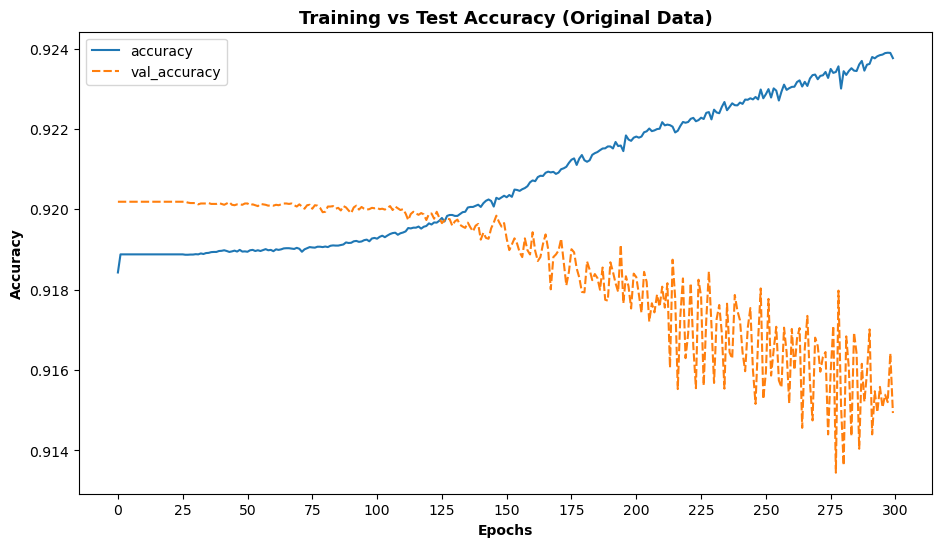

In [93]:
plt.figure(figsize=(11,6))
sns.lineplot(data = losses_original[['accuracy', 'val_accuracy']])
plt.title('Training vs Test Accuracy (Original Data)', fontsize = 13, fontweight="bold")
plt.xlabel('Epochs', fontweight="bold")
plt.ylabel('Accuracy', fontweight="bold")

plt.xticks(range(0, 301, 25))

plt.show()

In [106]:
losses_original.iloc[50:51,:]

,loss,accuracy,recall,val_loss,val_accuracy,val_recall
50,0.249458,0.918943,1.0,0.249756,0.920144,1.0


In [120]:
classifier_original_data_optimal_50_epoch = Sequential()

classifier_original_data_optimal_50_epoch.add(Dense(110, kernel_initializer = 'he_uniform',activation='relu',input_dim = 209))
classifier_original_data_optimal_50_epoch.add(Dense(55, kernel_initializer = 'he_uniform',activation='relu'))

classifier_original_data_optimal_50_epoch.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))


classifier_original_data_optimal_50_epoch.compile(optimizer = 'Adam', 
                                                 loss = 'binary_crossentropy', 
                                                 metrics = ['accuracy', tf.keras.metrics.Recall(thresholds=0)])

model_history_original = classifier_original_data_optimal_50_epoch.fit(x = X_train_original, 
                                                                   y = y_train, 
                                                                   validation_data = (X_test_original, y_test), 
                                                                   batch_size = 50000, 
                                                                   epochs = 50)

Epoch 1/50
5/5 [==============================] - 6s 687ms/step - loss: 0.4680 - accuracy: 0.9185 - recall_3: 1.0000 - val_loss: 0.3438 - val_accuracy: 0.9202 - val_recall_3: 1.0000
Epoch 2/50
5/5 [==============================] - 2s 476ms/step - loss: 0.3143 - accuracy: 0.9189 - recall_3: 1.0000 - val_loss: 0.2800 - val_accuracy: 0.9202 - val_recall_3: 1.0000
Epoch 3/50
5/5 [==============================] - 3s 484ms/step - loss: 0.2870 - accuracy: 0.9189 - recall_3: 1.0000 - val_loss: 0.2926 - val_accuracy: 0.9202 - val_recall_3: 1.0000
Epoch 4/50
5/5 [==============================] - 3s 512ms/step - loss: 0.2972 - accuracy: 0.9189 - recall_3: 1.0000 - val_loss: 0.2886 - val_accuracy: 0.9202 - val_recall_3: 1.0000
Epoch 5/50
5/5 [==============================] - 3s 515ms/step - loss: 0.2883 - accuracy: 0.9189 - recall_3: 1.0000 - val_loss: 0.2778 - val_accuracy: 0.9202 - val_recall_3: 1.0000
Epoch 6/50
5/5 [==============================] - 2s 479ms/step - loss: 0.2796 - accuracy:

Epoch 46/50
5/5 [==============================] - 2s 441ms/step - loss: 0.2502 - accuracy: 0.9189 - recall_3: 1.0000 - val_loss: 0.2495 - val_accuracy: 0.9202 - val_recall_3: 1.0000
Epoch 47/50
5/5 [==============================] - 2s 445ms/step - loss: 0.2500 - accuracy: 0.9189 - recall_3: 1.0000 - val_loss: 0.2494 - val_accuracy: 0.9203 - val_recall_3: 1.0000
Epoch 48/50
5/5 [==============================] - 2s 445ms/step - loss: 0.2499 - accuracy: 0.9189 - recall_3: 1.0000 - val_loss: 0.2494 - val_accuracy: 0.9202 - val_recall_3: 1.0000
Epoch 49/50
5/5 [==============================] - 2s 445ms/step - loss: 0.2498 - accuracy: 0.9190 - recall_3: 1.0000 - val_loss: 0.2493 - val_accuracy: 0.9202 - val_recall_3: 1.0000
Epoch 50/50
5/5 [==============================] - 2s 416ms/step - loss: 0.2497 - accuracy: 0.9190 - recall_3: 1.0000 - val_loss: 0.2494 - val_accuracy: 0.9202 - val_recall_3: 1.0000


In [173]:
y_pred_train = classifier_original_data_optimal_50_epoch.predict(X_train_original)
y_pred_train = np.where(y_pred_train > 0.45, 1,0)


y_pred_test = classifier_original_data_optimal_50_epoch.predict(X_test_original)
y_pred_test = np.where(y_pred_test > 0.45, 1,0)

2883/2883 [==============================] - 11s 4ms/step


In [174]:
np.unique(y_pred_train, return_counts=True)

(array([0, 1]), array([214742,    515], dtype=int64))

In [175]:
np.unique(y_pred_test, return_counts=True)

(array([0, 1]), array([92025,   229], dtype=int64))



************************** Confusion Matrix (Training Data) **************************




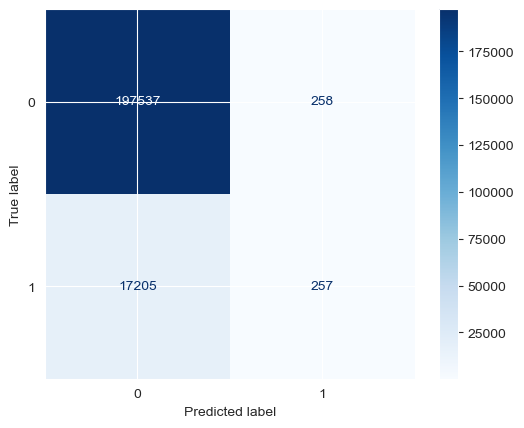

In [176]:
print("\n\n************************** Confusion Matrix (Training Data) **************************\n\n")

cm = confusion_matrix(y_train, y_pred_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='')
plt.show()

In [177]:
print("\n\n************************** Classification Report (Train Data) **************************\n\n")
print(classification_report(y_train, y_pred_train))



************************** Classification Report (Train Data) **************************


              precision    recall  f1-score   support

           0       0.92      1.00      0.96    197795
           1       0.50      0.01      0.03     17462

    accuracy                           0.92    215257
   macro avg       0.71      0.51      0.49    215257
weighted avg       0.89      0.92      0.88    215257





************************** Confusion Matrix (Test Data) **************************



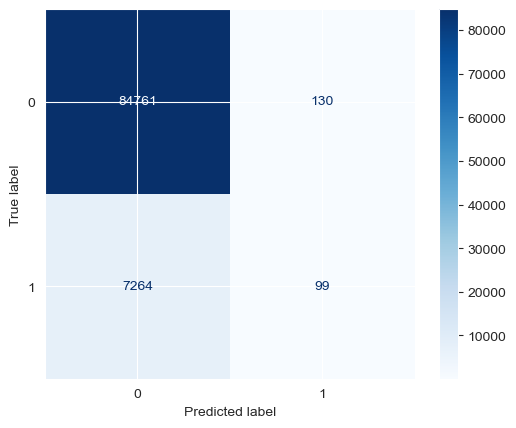

In [178]:
print("\n\n************************** Confusion Matrix (Test Data) **************************\n")

cm = confusion_matrix(y_test, y_pred_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='')
plt.show()

In [179]:
print("\n\n************************** Classification Report (Test Data) **************************\n\n")
print(classification_report(y_test, y_pred_test))



************************** Classification Report (Test Data) **************************


              precision    recall  f1-score   support

           0       0.92      1.00      0.96     84891
           1       0.43      0.01      0.03      7363

    accuracy                           0.92     92254
   macro avg       0.68      0.51      0.49     92254
weighted avg       0.88      0.92      0.88     92254



In [180]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_test).ravel()
specificity = tn / (tn+fp)
sensitivity = tp / (tp+fn)

In [181]:
print(f"True Negative: {tn}")
print(f"False Positive: {fp}")
print(f"False Negative: {fn}")
print(f"True Positive: {tp}")

True Negative: 84761
False Positive: 130
False Negative: 7264
True Positive: 99


In [186]:
# recall = sensitivity = TP / (TP + FN)
sensitivity = round(tp/(tp+fn),2)
print(f"Sensitivity (or Recall): {sensitivity}")

Sensitivity (or Recall): 0.01


In [182]:
# Getting predicted probabilites values, for plotting of ROC curve

test_pred_probs = classifier_original_data_optimal_50_epoch.predict(X_test_original)

2883/2883 [==============================] - 12s 4ms/step


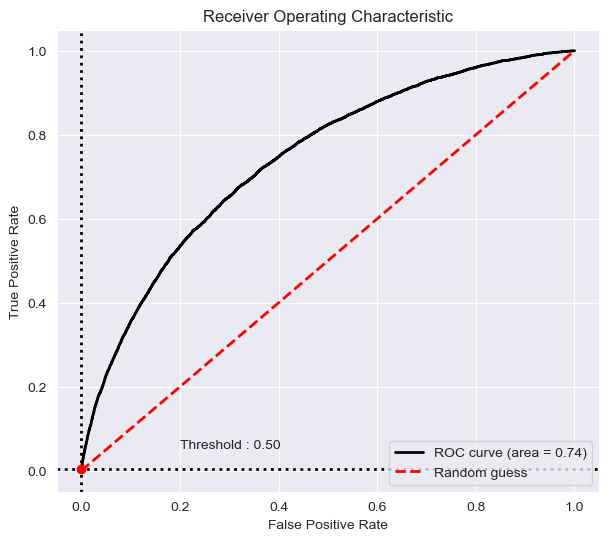

In [183]:
# plotting ROC Curve

# Visualisation with plot_metric
bc = BinaryClassification(y_test, test_pred_probs, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(7,6))
bc.plot_roc_curve()
plt.show()

In [191]:
area_under_roc_curve = round(roc_auc_score(y_test, test_pred_probs),2)
print(f"Area Under 'Receiver Operating Characteristics' curve (ROC Curve): {area_under_roc_curve}")

Area Under 'Receiver Operating Characteristics' curve (ROC Curve): 0.74
